# Redes Neurais Convolucionais




Redes Neurais Profundas clássicas foram capazes de resolver uma variedade grande de problemas, incluindo problemas com padrões complexos de decifrar, entretanto, apresentavam uma dificuldade particular em algumas tarefas simples para o ser humano, como reconhecer rostos, objetos, palavras, entre outros. Grande parte dessa dificuldade se dá pelo fato de camadas totalmente conectadas (*fully connected*) se basearem em combinações lineares, que ignoram totalmente o posicionamento dos dados entre si, fator muito importante para as tarefas citadas.

A solução para esse problema veio com a criação das **redes neurais convolucionais**, que baseiam-se na arquitetura do cérebro dos animais. Percebeu-se que o procedimento de visualização cerebral de uma imagem não era feito pixel-a-pixel, como em uma rede tradicional, mas sim com uma série de respostas locais a padrões pré-definidos, como linhas horizontais, verticais, inclinadas e curvas simples. Essas respostas são, então, enviadas para os neurônios seguintes, que fazem o mesmo procedimento, só que agora, ao invés de operar sob a imagem original recebida, o fazem sobre as ativações enviadas dos neurônios anteriores, conseguindo compor a informação enviada em algo mais complexo (quadrados, triângulos, círculos, etc.). O processo continua até a última camada de neurônios. Dessa forma, qualquer forma complexa pode ser captada e representada pelo cerébro.

<a href="https://ibb.co/swvSLDx"><img src="https://i.ibb.co/J7RLXb6/resposta-neuronio-cnn.jpg" alt="resposta-neuronio-cnn" border="0"></a>
<figcaption>Figura 1 - Representaçãp da visão.</figcaption>

A tradução matemática desse comportamento cerebral se dá por meio da operação de **convolução**.






## A operação de Convolução

A convolução é uma operação matemática entre duas funções, $f$ e $g$, resultando em uma nova função $h$, tal que, $h(x)$ é o resultado da soma dos produtos das funções quando a $g$ é deslocada $x$ unidades para a direita. 
Isto é definido da seguinte forma:

$\displaystyle h(x) = \int_{-\infty }^{\infty } f(u)\cdot g(x - u)du$

A propriedade mais importante dessa operação no contexto de redes neurais é o fato que, o valor de $h(x)$ depende do quão coincidentes, ou seja, parecidas, são as funções $f$ e $g$ naquele ponto, sendo máximo no ponto de maior semelhança. 
Portanto, podemos definir uma uma função $g$, geralmente chamada de filtro, de tal forma que possamos encontrar o grau de similaridade com $f$, geralmente chamada de sinal, em cada ponto do seu domínio. 

<a href='https://postimg.cc/YGLRTvS5' target='_blank'><img src='https://i.postimg.cc/RFXY6fxZ/conv.gif' border='0' alt='conv' width='500' height=200/></a>
<figcaption>Figura 2 - Exemplo de convolução 1d</figcaption>

Como os dados tratados em problemas de machine learning são discretos (vetores, matrizes, tensores), utilizamos a versão discreta da convolução.

$\displaystyle h(k) = \sum_{j=-\infty}^{\infty} f(j)\cdot g(k - j)$

---

## Aplicando a Convolução

Para entender melhor a operação, vamos fazer alguns exemplos.

Com a convolução, podemos criar um programa para detectar sequências crescentes em um conjunto de dados (convolução 1D). Para isso, vamos definir um filtro que represente uma "subida" e uma sequência de valores.

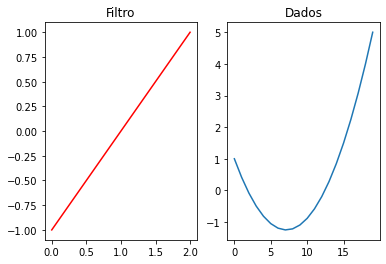

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2) # variáveis para plotagem

filtro = np.array([-1, 0, 1]) # filtro de tamanho 3 representando uma subida
y = np.array([ x**2 + x - 1 for x in np.linspace(-2,2,20) ]) # conjunto de dados

axs[0].plot(filtro, 'red')
axs[0].set_title("Filtro")
axs[1].plot(y)
axs[1].set_title("Dados")
plt.show()

A biblioteca **numpy** já possui uma implementação da convolução. Por padrão, as bibliotecas operam com o filtro invertido. Para corrigir isso, basta multiplica-lo por -1.

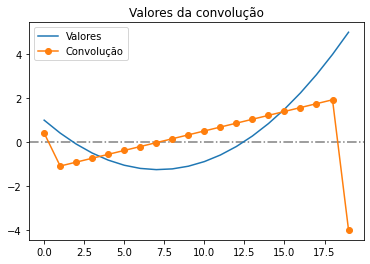

In [ ]:
y_filtro = np.convolve(y, -1*filtro, mode="same")

# eixos
plt.axhline(0,color='gray', linestyle='-.')

plt.plot(y, label="Valores")
plt.plot(y_filtro, '-o', label="Convolução")
plt.title("Valores da convolução")
plt.legend()
plt.show()

Como podemos ver, o resultado da convolução é positivo quando a função está num intervalo crescente e negativo caso contrário. Essa informação é bem mais expressiva que os dados originais, que só contem valores avulsos da função, já que agora conseguimos indicar numéricamente a presença de padrões complexos.

Também podemos começar a notar um problema, como os valores são discretos, o filtro é incapaz de operar nas bordas, já que a função não possui valores mais à esquerda nem mais à direita. De fato, a operação de convolução pode possuir a característica de diminuir a dimensão do dado original, deixando-o mais denso.

---

Prosseguindo, vamos aplicar esses mesmos conceitos no contexto de processamento de imagens (convolução 2D).

<a target='_blank'><img src='https://icecreamlabs.com/wp-content/uploads/2018/08/33-con.gif' border='0' alt='conv' width=263 height=192/></a>
<figcaption>Figura 3 - Exemplo de convolução 2D discreta </figcaption>



A área de processamento de imagens foi a mais impactada pela criação das CNN (convolutional neural network), onde praticamente substituiram as redes neurais clássicas. Vamos ver como filtros são capazes de indicar padrões nas imagens.



In [ ]:
# Baixando a imagem honeycomb.png
!curl https://image.flaticon.com/icons/png/128/393/393101.png --output honeycomb.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1883  100  1883    0     0   7562      0 --:--:-- --:--:-- --:--:--  7592


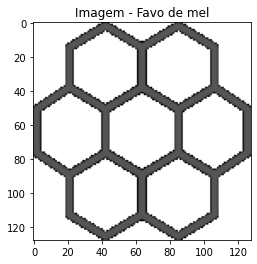

In [ ]:
imagem = np.mean( plt.imread('honeycomb.png'), axis=(2) ) # abrindo a imagem e
                                                          # tornando preto e branco
plt.imshow(imagem, cmap='gray')
plt.title("Imagem - Favo de mel")
plt.show()

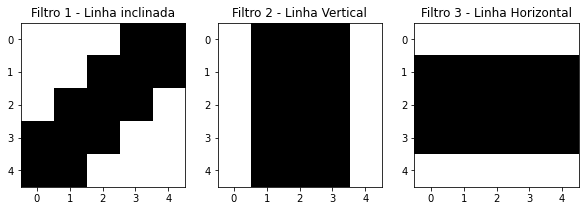

In [ ]:
# Importando a operação de convolução
from scipy.signal import convolve2d

# Definindo alguns filtros para a convolução
# Os filtros são "normalizados", ou seja, a soma de todos os seus valores é 0
f1 = np.array([ [ 1/12, 1/12, 1/12, -1/13, -1/13],
                [ 1/12, 1/12, -1/13, -1/13, -1/13],
                [ 1/12, -1/13, -1/13, -1/13, 1/12],
                [ -1/13, -1/13, -1/13, 1/12, 1/12],
                [ -1/13, -1/13, 1/12, 1/12, 1/12]] )
f2 = np.array([ [1/10, -1/15, -1/15, -1/15, 1/10],
                [1/10, -1/15, -1/15, -1/15, 1/10], 
                [1/10, -1/15, -1/15, -1/15, 1/10],
                [1/10, -1/15, -1/15, -1/15, 1/10],
                [1/10, -1/15, -1/15, -1/15, 1/10]] )
f3 = np.array([ [ 1/10, 1/10, 1/10, 1/10, 1/10],
                [ -1/15, -1/15, -1/15, -1/15, -1/15],
                [ -1/15, -1/15, -1/15, -1/15, -1/15],
                [ -1/15, -1/15, -1/15, -1/15, -1/15],
                [ 1/10, 1/10, 1/10, 1/10, 1/10],])

fig, axs = plt.subplots(1,3, figsize=(10,30)) # variáveis para plotagem
axs[0].imshow(f1, cmap='gray')
axs[0].set_title("Filtro 1 - Linha inclinada")
axs[1].imshow(f2, cmap='gray')
axs[1].set_title("Filtro 2 - Linha Vertical")
axs[2].imshow(f3, cmap='gray')
axs[2].set_title("Filtro 3 - Linha Horizontal")
plt.show()

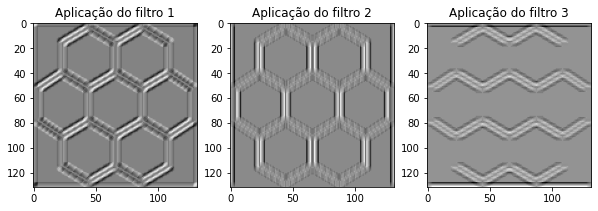

In [ ]:
imagem_f1 = convolve2d(imagem, f1)
imagem_f2 = convolve2d(imagem, f2)
imagem_f3 = convolve2d(imagem, f3)

fig, axs = plt.subplots(1,3, figsize=(10,30)) # variáveis para plotagem
axs[0].imshow(imagem_f1, cmap='gray')
axs[0].set_title("Aplicação do filtro 1")
axs[1].imshow(imagem_f2, cmap='gray')
axs[1].set_title("Aplicação do filtro 2")
axs[2].imshow(imagem_f3, cmap='gray')
axs[2].set_title("Aplicação do filtro 3")
plt.show()

Como podemos ver acima, cada filtro responde positivamente, regiões mais claras, quando encontra padrões similares a ele, e negativamente/neutramente caso contrário. A esse conjuto de ativações, damos o nome de **feature map**.Como explicado na introdução, esse comportamento permite a criação de detectores de padrão, extremamente importantes na composição de uma imagem.

*Obs. Diz-se que uma convolução é n-dimensional quando seu filtro se desloca por n dimensões, ou seja, um filtro 1D pode ser aplicado em um contexto 2D*

*Obs. Um ponto muito importante na dinâmica das CNNs é a redução de dimensionalidade. A depender da aplicação, pode-se ou não desejar manter os efeitos da diminuição de dimensionalidade causados pelos filtros*

## Aplicações e vantagens das CNN

No contexto das redes neurais, surge a chamada **camada convolucional**, responsável por aplicar um conjunto de filtros convolucionais aos dados de entrada. Essas camadas são utilizadas para aprender os padrões intríscecos dos dados, refinando a informação inicial em features mais representativas.

Uma consequência disso é que, diferentemente de uma rede MLP, onde a mudança na ordem dos inputs acarreta em mudanças drásticas no output, uma rede convolucional possui a característica de ser *shift invariant*. Essa propriedade garante que, mesmo que as features dos inputs sejam transladadas espacialmente, o output não irá mudar muito, já que a rede responde sempre a padrões locais, independentemente da sua posição.

<img src="https://i.ibb.co/WnW551q/Shift-invariant.jpg" 
width=414 height=370
alt="Shift-invariant-2" border="0"></a>
<figcaption> Figura 4 - Invariância espacial nas redes convolucionais </figcaption>

  Analogamente aos pesos de uma *fully connected*, o processo de aprendizado ocorre por meio do algoritmo de otimização *Backpropagation*, atualizando os filtros a cada iteração.

Os outputs das redes convolucionais profundas podem ser usados de várias maneiras. Como seletores de padrões, por exemplo, onde a rede é treinada para reconhecer padrões de alto nível que servem de entrada para um MLP, responsável por uma tarefa de classificação ou regressão.


<a target='_blank'><img src='https://www.venturus.org.br/wp-content/uploads/2019/12/CNN.png' border='0' alt='conv' width=450 height=250/></a>
<figcaption>Figura 5 - Exemplo de classificador com rede convolucional</figcaption>

*Exemplo de Rede neural convolucional + MLP para classificação*

Outra possível aplicação é como geradora de dados, como imagens, textos e áudio. Neste caso, a rede é totalmente convolucional.

<a target='_blank'><img src='https://thegradient.pub/content/images/2018/05/SCNet.png' border='0' alt='conv' width='800' height=150/></a>
<figcaption> Figura 6 - Exemplo de semantic segmentation</figcaption>


Além da diversidade de aplicações, as CNN trazem uma outras vantagens. Por trabalharem com filtros visuais dotados de significado, os pesos da rede podem ser facilmente plotados e interpretados, minimizando o problema das *black box*, recorrente em arquiteturas MLP.

Outro ponto importante é que tarefas similares irão possuir os mesmos padrões de baixo-nível, ou seja, caso queiramos treinar uma rede para detectar a marca de um carro, podemos reutilizar com facilidade uma rede que detecta se há um carro na imagem (transfer learning), pois ambas, a nível incial, estarão procurando as mesmas formas.


Você pode visualizar um pouco melhor como as CNNs funcionam, nesse [site](https://poloclub.github.io/cnn-explainer/).

## Implementando CNNs com o Keras



A partir daqui, usaremos a API do Keras com o tensorflow para inplementar alguns exemplos de CNN.

### A camada convolucional

No keras, uma camada convolucional segue, para a maioria dos casos, a seguinte estrutura:

```python 
Conv2D(filters, kernel_size, activation, padding, strides)
```
Onde:
- **filters** indica quantos filtros serão treinados na camada
- **kernel_size** indica o formato dos filtros
- **activation** indica a função de ativação da camada
- **padding** escolhe a política de preenchimento das bordas
- **strides** indica o espaçamento entre cada aplicação do filtro

Para utilizar uma camada de forma avulsa no Keras basta instancia-la com o método adequado e passar os dados como parâmetro para o objeto.

In [ ]:
from tensorflow import keras

# instanciando 
camada = keras.layers.Conv2D( 3, (5,5), activation='relu' )
# aplicando
imagem_ = camada( imagem.reshape(1, 128, 128, 1) ) # Reshape necessário para a camada conv2d
imagem_.shape

**Entendendo um pouco mais sobre a redução de dimensionalidade**

Na camada acima, temos 3 filtros de tamanho 5x5, resultando na dimensão final de (124,124,3). Essa redução de dimensionalidade, como citado acima, é resultado da aplicação dos filtros sobre a imagem original.

Caso queiramos remover esses efeitos, podemos atribuir *padding="same"*. A imagem então, ganhará uma borda externa preenchida, de modo a preservar as dimensões atuais.

<a target='_blank'><img src='https://miro.medium.com/max/1332/1*e4jJGDUENyF9A93q1qtSew.png' border='0' alt='conv' width='450' height=150/></a>
<figcaption> Figura 7 - Exemplo de zero padding </figcaption>

In [ ]:
# instanciando com padding
camada = keras.layers.Conv2D( 3, (5,5), activation='relu', padding="same" )
# aplicando a convolucao
imagem_ = camada( imagem.reshape(1, 128, 128, 1) )
imagem_.shape

TensorShape([1, 128, 128, 3])

Outro hiperparâmetro responsável pela dimensionalidade resultante da CNN é o *stride*, que representa o tamanho do salto dado pelo filtro ao longo dos dados. Seu valor padrão é 1, para o caso 1d, e (1,1) para o caso 2d.


<a target='_blank'><img src='https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif' border='0' alt='conv' width=234 height=168/></a>
<a target='_blank'><img src='https://qph.fs.quoracdn.net/main-qimg-d552433faa8363df84c53b905443a556' border='0' alt='conv' width=234 height=168/></a>
<figcaption> Figuras 8 e 9 - Representação de convolução com stride (1,1) e (2,2) </figcaption>

Para todos os casos, a dimensão de saída da camada convolucional segue a seguinte relação:

$n_{out} = \left \lfloor \frac{n_{in} + 2p - k}{s} \right \rfloor$+1

- $n_{in}$ Dimensão de entrada
- $p$ tamanho do padding
- $k$ tamanho do kernel
- $s$ tamanho do stride 

### A camada de pooling

Uma das camadas que sempre acompanha a *convolutional layer* nas CNNs é a *pooling layer* (camada de sub-amostragem). Seu principal objetivo é reduzir de a dimensionalidade das features por um fator $k$, aplicando os filtros de forma espaçada sem sobreposição. 

Os filtros das camadas de pooling não servem para detectar padrões, apenas para reduzir a dimensionalidade dos dados.

As camadas de pooling ajudam a deixar os features maps mais comprimidas, diminuindo a redundância de informação, preservando o contexto geral, ao invés do local. Essa transformação funciona como uma técnica de regularização, pois suaviza os detalhes dos dados orignais, além de ajudar a rede a se manter mais *shift invariant*. 

As técnicas mais famosas de pooling são:
- **Max Pooling** 
Reduz o tamanho dos feature maps por um fator $k$, utiliza a função $\max(X)$ como filtro.
- **Average Pooling** 
Reduz o tamanho dos feature maps por um fator $k$, utiliza a média dos dados como filtro.
- **Global Max Pooling** Reduz os feature maps a um único valor, utiliza a função $\max(X)$ como filtro.
- **Global Average Pooling** Reduz os feature maps a um único valor, utiliza a média dos dados como filtro.

<a target='_blank'><img src='https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/e60e56a6-8bcd-4b61-880d-7c621e2cb1d5:6595a68471ed37621734130ca2cb7997a1502a2b/Pooling.gif' border='0' alt='conv' width=400 height=222/></a>
<figcaption> Figura 10 - Tipos de Pooling </figcaption>

Vamos visualizar o pooling agindo sobre os feature maps gerados anteriormente.

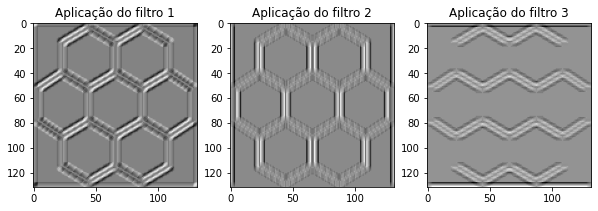

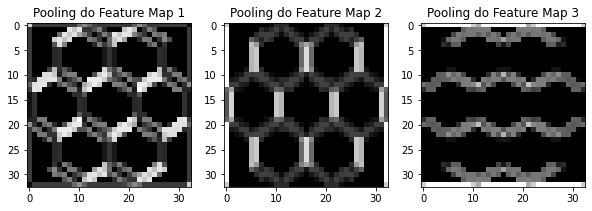

Dimensão original dos dados: 132x132
Dimensão final dos dados: 33x33


In [ ]:
# Instanciando uma camada para reduzir a dimensionalidade em 4x 
camada_pooling = keras.layers.MaxPool2D(4, dtype='float64')

# Juntando os feature maps em um array
feature_maps = np.array( [ imagem_f1, imagem_f2, imagem_f3 ] )
feature_maps = np.expand_dims(feature_maps, 3)

feature_maps_pool = camada_pooling(feature_maps)

fig, axs = plt.subplots(1,3, figsize=(10,30)) # variáveis para plotagem
axs[0].imshow(imagem_f1, cmap='gray')
axs[0].set_title("Aplicação do filtro 1")
axs[1].imshow(imagem_f2, cmap='gray')
axs[1].set_title("Aplicação do filtro 2")
axs[2].imshow(imagem_f3, cmap='gray')
axs[2].set_title("Aplicação do filtro 3")
fig, axs = plt.subplots(1,3, figsize=(10,30)) # variáveis para plotagem
axs[0].imshow(feature_maps_pool[0,:,:,0], cmap='gray')
axs[0].set_title("Pooling do Feature Map 1")
axs[1].imshow(feature_maps_pool[1,:,:,0], cmap='gray')
axs[1].set_title("Pooling do Feature Map 2")
axs[2].imshow(feature_maps_pool[2,:,:,0], cmap='gray')
axs[2].set_title("Pooling do Feature Map 3")
plt.show()
print( "Dimensão original dos dados: {:d}x{:d}".format(feature_maps.shape[1],
                                                       feature_maps.shape[2] )  )
print( "Dimensão final dos dados: {:d}x{:d}".format(feature_maps_pool.shape[1],
                                                    feature_maps_pool.shape[2] )  )

Como podemos ver pelas imagens, as features ainda conseguem manter a representatividade dos dados originais mesmo após terem sido reduzidos em 4x.

---

### Implementando um classificador de imagens

Como citado anteriormente, a principal área de aplicação das CNNs é a de processamento de imagens. Para entender um pouco mais do poder dessas redes em tarefas dess tipo, iremos implementar um classificador de imagens.

**Dados do problema**

Para efetuar a tarefa de classificação, vamos utilizar o dataset CIFAR10, que contém 60.000 imagens RGB 32x32 separadas entre 10 classes diferentes.

In [ ]:
from keras.datasets import cifar10  
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print("X_train shape:")
print(X_train.shape)
print("X_test shape:")
print(X_test.shape)

X_train shape:
(50000, 32, 32, 3)
X_test shape:
(10000, 32, 32, 3)


In [ ]:
## Viusualizando algumas imagens

np.random.seed(214)
indx = np.random.choice( range(len(X_train)), size=10 )
fig, axs = plt.subplots( 1, 10, figsize=(20,200) )

for (i,ind) in enumerate(indx):
  axs[i].imshow( X_train[ind] )
  axs[i].axis("off")
  axs[i].set_title( f"Classe {y_train[ind]}")

Para simplificar a tarefa, selecionaremos apenas 2 classes do dataset, **carros** e **gatos**. 

In [ ]:
# Selecionando as classes 1-carro, 2-gato
indices_train = np.argwhere( np.logical_or((y_train.ravel() == 1), (y_train.ravel() == 3)) )
indices_test =  np.argwhere( np.logical_or((y_test.ravel() == 1), (y_test.ravel() == 3))   )

X_train = X_train[ indices_train ].reshape(-1, 32,32,3)
X_test = X_test[ indices_test ].reshape(-1, 32,32,3)

# Mapeando 0 -> gato, 1 -> carro
y_train = y_train[ indices_train ] == 1
y_test = y_test[ indices_test ] == 1

NameError: ignored

In [ ]:
y_test

array([[[False]],

       [[ True]],

       [[False]],

       ...,

       [[False]],

       [[False]],

       [[ True]]])

**Criando o modelo de classificação**

A estratégia do modelo é utilizar um conjunto de camadas convolucionais como extratores de padrões, refinando a informação em features mais expressivas que possam ser enviadas para o classificador MLP. 

In [ ]:
## Instanciando o modelo
model = keras.models.Sequential([
  keras.layers.Conv2D(  8, (8,8), activation="relu", input_shape = (32,32,3) ), # 8 filtros de tamanho 8x8
  keras.layers.Conv2D(  8, (8,8), activation="relu" ), # 8 filtros de tamanho 8x8
  keras.layers.Conv2D( 16, (6,6), activation="relu" ), # 16 filtros de tamanho 6x6
  keras.layers.Conv2D( 32, (4,4), activation="relu" ), # 32 filtros de tamanho 4x4
                                                       # Fim da rede convolucional
  keras.layers.Flatten(),                              # Rede MLP para classificação
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64 , activation='relu'),
  keras.layers.Dense(1, activation='sigmoid'),
])

Com o *.summary()*, visualizamos a arquitetura em detalhes da rede.

In [ ]:
model.summary()

NameError: ignored

**Treinando o modelo**

In [ ]:
# Treinando o modelo
model.compile( optimizer='adam', loss='binary_crossentropy', metrics='accuracy' )
model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test, y_test), 
          callbacks=[keras.callbacks.EarlyStopping(patience=3)] )

A arquitetura acima foi capaz de chegar a mais de 90% de acurácia nos dados de teste, para um modelo simples e fácil de treinar, é um valor bastante expressivo, que demonstra o potencial das redes neurais convolucionais no processamento de imagens.

---

**Visualizando feature maps**

Para entender um pouco mais do que o modelo está fazendo, vamos visualizar os chamados **Feature maps**, que são as transformações feitas no dado original pela rede CNN.

In [ ]:
# Seleção das layers Convolucionais do modelo
cnn_models = [ 
  keras.models.Sequential( model.layers[:1] ),
  keras.models.Sequential( model.layers[:2] ),
  keras.models.Sequential( model.layers[:3] ),
  keras.models.Sequential( model.layers[:4] )
]

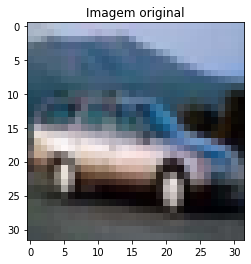

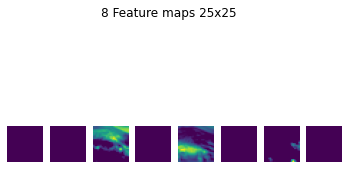

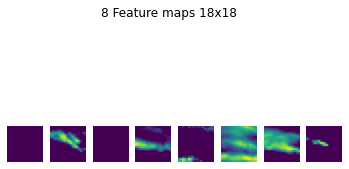

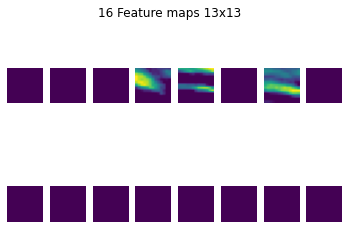

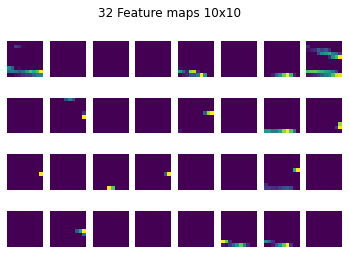

In [ ]:
def imprimir_filtros( img, model ):
  img_features = model( img.reshape(1, 32, 32, 3) )

  num_filtros = img_features.shape[-1]

  fig, axs = plt.subplots(nrows=int(num_filtros/8), ncols=8)
  axs_flatten = axs.flatten()
  fig.suptitle('{:d} Feature maps {:d}x{:d}'.format(img_features.shape[-1], 
                                                   img_features.shape[-2],
                                                   img_features.shape[-3] ) )
  for i in range( num_filtros ):
    axs_flatten[i].axis('off')
    axs_flatten[i].imshow( img_features[0,:,:,i] )

img = X_train[0]
plt.imshow( img )
plt.title("Imagem original")
imprimir_filtros( img, cnn_models[0] )
imprimir_filtros( img, cnn_models[1] )
imprimir_filtros( img, cnn_models[2] )
imprimir_filtros( img, cnn_models[3] )

Analisando as imagens acima notamos que a rede inicialmente aponta para padrões gerais, por isso, sua resposta é ampla e ocupa quase toda a imagem. Conforme a profundidade aumenta, os padrões se tornam cada vez mais específicos e complexos (como rodas, janelas, focinhos, mãos), e por isso a reposta se torna mais local.

A resposta a esses padrões complexos é então enviada ao modelo classificador, que agora recebe features muito mais expressivas, compreensíveis e descritivas dos dados originais. Com isso, a rede final se torna capaz de efetuar uma classificação de alta acurácia.


<a href="https://ibb.co/VqfrHpB"><img src="https://i.ibb.co/vj0gsvz/CNNclassifier.jpg" alt="Desenho-sem-t-tulo" border="0" width=480 height=360
style="display: block; margin-left: auto; margin-right: auto;width: 50%;"></a>
<figcaption> Figura 11 - Funcionamento de classificador com rede convolucional </figcaption>

### Implementando um classificador textual

Embora a maioria das aplicações das CNNs seja no contexto de imagens, elas possuem grande potencial em outras áreas. O modelo que iremos implementar nesta seção é relativo à área de *Natural Language Processing (NLP)*.


**Dados do problema**

Para esta tarefa, selecionamos o dataset SMSSpam, que contém aproximadamente 5000 SMS classificados como SPAM ou não-SPAM. Esse dataset é particularmente bom para testarmos o potencial das CNN, pois contém textos curtos e fáceis de compreender.

In [ ]:
# Download do dataset
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
!unzip smsspamcollection.zip

--2022-01-13 14:13:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   903KB/s    in 0.2s    

2022-01-13 14:13:42 (903 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


Com o dataset carregado, podemos importa-lo usando o pandas.

In [ ]:
# Importando com o pandas
import pandas as pd
sms_data = pd.read_table("SMSSpamCollection", header=None)

# Renomeando as colunas
sms_data.rename(columns={0:'spam',1:'text'}, inplace=True) 

# Visualizando alguns textos
sms_data.head(10)

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Para utiliza-lo no modelo, precisamos mapear numéricamente os dados da coluna SPAM.

In [ ]:
# Mapeando 1 - Spam, 0 - Ham 
sms_data['spam'] = sms_data['spam'].map({"spam":1,"ham":0})

Este dataset possui um desbalanço nas classes, já que existem muito mais não-SPAMS do que SPAMS. Para resolver isso, triplicaremos os dados de SPAM. 

*OBS. Sendo extreamemnte rigoroso, esse processo deveria ser feito com mais cautela, mas como nosso objetivo é somente aplicar os exemplos às redes convolucionais, podemos continuar assim*

In [ ]:
print("Dados antes do aumento")
sms_data['spam'].value_counts()

Dados antes do aumento


0    4825
1     747
Name: spam, dtype: int64

In [ ]:
positive_spam = sms_data.query("spam == 1")
sms_data = sms_data.append(positive_spam).append(positive_spam)

print("Dados depois do aumento")
sms_data['spam'].value_counts()

Dados depois do aumento


0    4825
1    2241
Name: spam, dtype: int64

Para separar os dados de treino e teste, utilizaremos a biblioteca sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
text = sms_data['text']
X_train, X_test, y_train, y_test = train_test_split(text, sms_data['spam'].to_numpy(), test_size=0.25,
                                                    stratify=sms_data['spam'].to_numpy()) 

print("X_train shape:")
print(len(X_train))
print("X_test shape:")
print(len(X_test))

X_train shape:
5299
X_test shape:
1767


**Definindo o modelo**

Com os dados em mãos, basta definir a estratégia escolhida para atacar o problema, e então criar arquitetura da rede.
Primeiramente, precisamos escolher como nosso dado será representado. No contexto das imagens, o *pixel* é a unidade básica sobre qual a rede opera, no nosso caso, escolheremos o *caractere*. Dessa forma, um texto será representado por um vetor de caracteres.

$ \text{Meu texto} \rightarrow \left[ [M],[e],[u],[\ ],[t],[e],[x],[t],[o]\right] $

Para transformar os dados em valores numéricos, usaremos o valor de cada caractere da tabela ASCII. 
Como as sequências textuais possuem tamanhos diferentes, iremos escolher um tamanho padrão para todas elas, as menores receberão espaços à direita e as maiores serão truncadas.

In [ ]:
# Escolhendo o tamanho que engloba 95% dos textos
maior_tamanho_string = int(np.quantile( np.array([len(text) for text in X_train]), 0.95))

# funções responsáveis pela transformação
equalizar_sequencia = lambda texto, tamanho : texto.ljust( tamanho, ' ' )[:tamanho]
transformar_ascii = lambda texto : [ [ord(c)] for c in texto]

# Equalizando o tamanho de todas as sequencias - Padding
X_train_pad = [ equalizar_sequencia(text, maior_tamanho_string) for text in X_train]
X_test_pad = [ equalizar_sequencia(text, maior_tamanho_string) for text in X_test]

# Transformando cada caractere em um valor numérico
X_train_final = np.array( [ transformar_ascii(text) for text in X_train_pad ])
X_test_final = np.array( [ transformar_ascii(text) for text in X_test_pad ])

print("Tamanho das sequências: ", maior_tamanho_string)
print(X_train_final.shape)
print(X_test_final.shape)

Tamanho das sequências:  161
(5299, 161, 1)
(1767, 161, 1)


Pela natureza desses dados, já conseguimos perceber que a nossa rede terá camadas de convolução 1D, e seus filtros vão se deslocar pelos caracteres das frases.

Algo importante de se pontuar é *o que exatamente os fitros irão aprender?* Assim como na imagem, na escrita também existem padrões de baixo nível e alto nível. Provavelmente, as camadas iniciais da rede aprenderão alguns posicionamentos específicos de letras e sílabas. Conforme a profundidade aumenta, espera-se que ela aprenda a identificar palavras-chave, termos importantes, e até frases completas.

**Criando o modelo de classificação**

Nesta arquitetura, aproveitando a grande dimensionalidade das features de entrada, poderemos aplicar camadas de Pooling.

In [ ]:
keras.backend.clear_session()

Todas as layers possuem padding="same", a redução de dimensionalidade vem apenas das camadas de pooling. Como textos são dados muito ruidosos, adicionamos várias camadas de BatchNormalization para evitar overfitting.

In [ ]:
text_model = keras.models.Sequential([
  # Arquitetura convolucional
  # todas as layers possuem padding="same", a redução de dimensionalidade
  # vem apenas das camadas de pooling
  keras.layers.Conv1D(128, 16, padding="same", activation="selu", input_shape=X_train_final.shape[1:]),
  keras.layers.MaxPool1D(2),
  keras.layers.Conv1D(256, 8, padding="same", activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool1D(2),
  keras.layers.Conv1D(256, 8, padding="same", activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool1D(2),
  keras.layers.Conv1D(512, 4, padding="same", activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPool1D(2),
  keras.layers.Conv1D(512, 4, padding="same", activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.Conv1D(512, 4, padding="same", activation="selu"),

  keras.layers.Flatten(), # classificador 
  keras.layers.Dense(512, activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(216, activation="selu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(64, activation="selu"),
  keras.layers.Dense(1, activation="sigmoid"),
])

In [ ]:
text_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 161, 128)          2176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 80, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 80, 256)           262400    
                                                                 
 batch_normalization (BatchN  (None, 80, 256)          1024      
 ormalization)                                                   
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 40, 256)          0         
 1D)                                                             
                                                        

In [ ]:
text_model.compile(optimizer="nadam", loss="binary_crossentropy", metrics='accuracy')
text_model.fit(x=X_train_final, y=y_train, epochs=100, validation_split=0.20,
               callbacks=[keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)])

Epoch 1/100
133/133 [==============================] - 17s 29ms/step - loss: 0.3528 - accuracy: 0.8644 - val_loss: 0.8926 - val_accuracy: 0.7764
Epoch 2/100
133/133 [==============================] - 3s 21ms/step - loss: 0.2437 - accuracy: 0.9021 - val_loss: 0.2352 - val_accuracy: 0.9123
Epoch 3/100
133/133 [==============================] - 3s 21ms/step - loss: 0.2320 - accuracy: 0.9104 - val_loss: 0.4224 - val_accuracy: 0.8472
Epoch 4/100
133/133 [==============================] - 3s 21ms/step - loss: 0.2152 - accuracy: 0.9181 - val_loss: 1.4812 - val_accuracy: 0.6802
Epoch 5/100
133/133 [==============================] - 3s 20ms/step - loss: 0.1667 - accuracy: 0.9413 - val_loss: 1.5338 - val_accuracy: 0.6170
Epoch 6/100
133/133 [==============================] - 3s 21ms/step - loss: 0.1353 - accuracy: 0.9516 - val_loss: 0.3617 - val_accuracy: 0.8755
Epoch 7/100
133/133 [==============================] - 3s 22ms/step - loss: 0.1278 - accuracy: 0.9540 - val_loss: 0.5036 - val_accuracy

O modelo tenta prever classes em um conjunto desbalanceado, mesmo após o oversampling, o número de não-spams ainda é bem maior que o de spams.
Portanto, não é ideal avalia-lo com a acurácia. Ao invés disso, utilizaremos as métricas recall, precision e f1.

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_test_pred = np.array(text_model(X_test_final)).flatten() > 0.5

print(f"Accuracy score: {accuracy_score(y_test, y_test_pred).round(2)}")
print(f"Recall score: {recall_score(y_test, y_test_pred).round(2)}")
print(f"Precision score: {precision_score(y_test, y_test_pred).round(2)}")
print(f"F1 score: {f1_score(y_test, y_test_pred).round(2)}")


Accuracy score: 0.89
Recall score: 0.71
Precision score: 0.93
F1 score: 0.81


Em geral, nosso modelo apresenta uma ótima performace. 

Geralmente, para problemas como esse, que lidam com sequências, o ideal é que as redes convolucionais trabalhem em conjunto com outro tipo de arquitetura, as *recurrent neural networks* e/ou que as features passem por um preprocessamento mais refinado. Mesmo não sendo o cenário ideal, a rede conseguiu efetuar a tarefa com bons resultados, demonstrando, mais uma vez, o potencial das CNN.

**Extra**

Como exercício extra, criaremos alguns SMS ficcionais e veremos a capacidade do modelo em classifica-los corretamente.

In [ ]:
my_sms_ = ["Hello Pedro, how are you???", 
          "Mom, i let the keys over the table",
          "Cyntia! Last weekends draw shows that you won a U$1000 prize GUARANTEED. Call 09064012160.",
          "John, congrats!! you won a special trip, call 99128199 to get your prize. You need to call in the next 24 hours",
          "Check out all vivo's bonus offers available to your plan!! call 0800101515 and know more",
          "Hello Pedro, i miss you, call me please...",
          "The brazillian population has been afraid of crime?? Answer yes or no to 9909212",
          "WINNER, you are the 5.000.000 amazon shop client and won a U$ 2.000.000 prize!!",
          "Type MONEY in next 4 hours to easy get infinity amounts of money",
          "URGENT! You have credits to spent. To use your credit, send U$ 2.00 to this number"
          ]

# Tratando os dados
my_sms = [equalizar_sequencia(text, maior_tamanho_string) for text in my_sms_]
my_sms = np.array( [ transformar_ascii(text) for text in my_sms ])

# Fazendo as predições
my_y = np.array(text_model(my_sms))

print("{:115s} {:10s}".format(" "*10+"Texto", "Chance de SPAM"))
for text, score in zip(my_sms_, my_y):
  print("{:120s} {:6.1f} %".format(text, 100*score[0]))

          Texto                                                                                                     Chance de SPAM
Hello Pedro, how are you???                                                                                                 0.4 %
Mom, i let the keys over the table                                                                                          0.6 %
Cyntia! Last weekends draw shows that you won a U$1000 prize GUARANTEED. Call 09064012160.                                 76.9 %
John, congrats!! you won a special trip, call 99128199 to get your prize. You need to call in the next 24 hours            25.6 %
Check out all vivo's bonus offers available to your plan!! call 0800101515 and know more                                   33.2 %
Hello Pedro, i miss you, call me please...                                                                                  1.0 %
The brazillian population has been afraid of crime?? Answer yes or no to 9909212         

## Referências

- Keras convolutional layers. Disponível em https://keras.io/api/layers/convolution_layers/.
- Keras CIFAR10 small images classification dataset. Disponível em https://keras.io/api/datasets/cifar10/.
- SMS Spam dataset. Disponível em https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
- A Gentle Introduction to Pooling Layers for Convolutional Neural Networks. Disponível em https://machinelearningmastery.com/.pooling-layers-for-convolutional-neural-networks/.
- CNN explainer. Disponível em https://poloclub.github.io/cnn-explainer/.
- GERON, Aurelien. *Hands-on machine learning with scikit-learn keras and tensorflow*. 2º edição. O'Reilly Media, Setembro de 2019.
- GOLDBERG, Yoav. *Neural network methods in Natural Language Processing*. Graeme Hirst, Março de 2017; 